# Pymaceuticals Inc.
---

### Analysis

- There was a roughly even distribution of male and female mice (50.6% vs 49.4%)
- Of all the drug treatments in the experiment, Capomulin and Ramicane had the most number of mice per regiment (230 and 228), while Propriva had the least number of observable mice (161). This is important to note because there is more data collected from treatments that utiized more mice. In this experiment, more data is better to assist in the accuracy of the correlation between the independent and dependent variables. 
- The line plot of tumor volume vs. time point for a single mouse treatment of Capomulin has a negative correlation. This may reveal the efficacy of Capomulin as tumor volume decreased as the days of Capomulin treatment increased. 
- The regression analysis helps us understand how the dependent variable, average tumor size, will change when the independent variable, mice weight, changes. 
- The correlation coefficient between mouse weight and average tumor size is 0.84. This indicates a positive correlation between mouse weight an average tumor size. When mouse weight increases, so does average tumor size.
- The r squared value helps to measure the proportion of the variance for average tumor size that's explained by mice weight. Because the r sqaured value is 0.709, roughly 70% of the model fits the data. Because the r-squared value assists in predicting how well a regression model predicts the outcome of observed data, in our case, mice weight predicts average tumor size fairly well. 
 

In [1]:
# Dependencies and Setup
import random
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df=pd.merge(study_results, mouse_metadata, on="Mouse ID", how='left')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_id=combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id=combined_data_df.loc[combined_data_df["Mouse ID"]=="g989",:]
duplicate_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mice_id)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.(supposed to be 248)
# clean_df["Mouse ID"].count()
num_mice=clean_df["Mouse ID"].nunique()
num_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem=clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()


summary_stat=pd.DataFrame({"Mean Tumor Volume": mean, 
                           "Median Tumor Volume": median,
                           "Tumor Volume Variance": var,
                           "Tumor Volume Std.Dev.": std,
                           "Tumor Volume Std. Err.": sem})

# Display the Summary Statistics table
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg=clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
mice_count=clean_df['Drug Regimen'].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

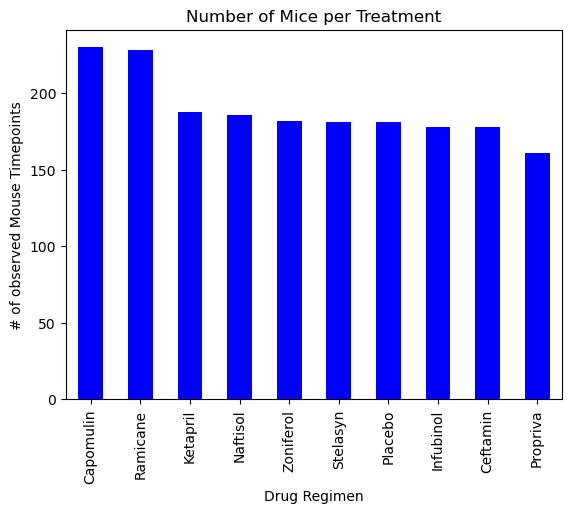

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_barchart=mice_count.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.title("Number of Mice per Treatment")

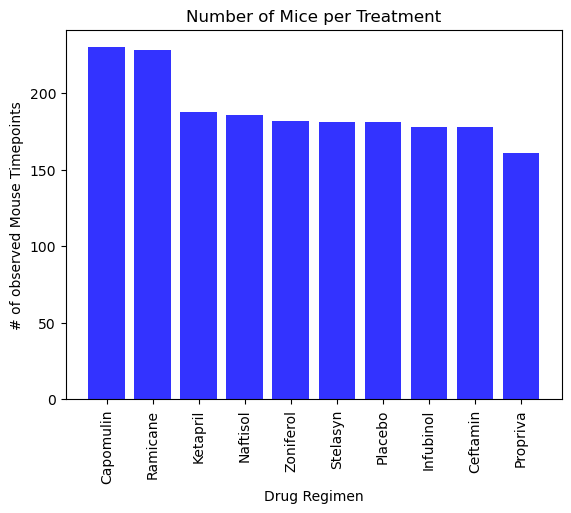

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=mice_count.index.values
y_axis=mice_count.values

plt.bar(x_axis,y_axis,color='b', alpha=0.8, align='center')

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

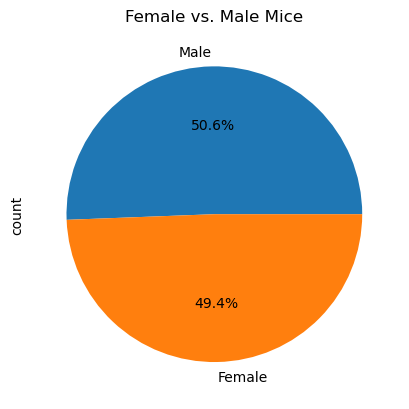

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data=clean_df['Sex'].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct="%1.1f%%")
plt.show()

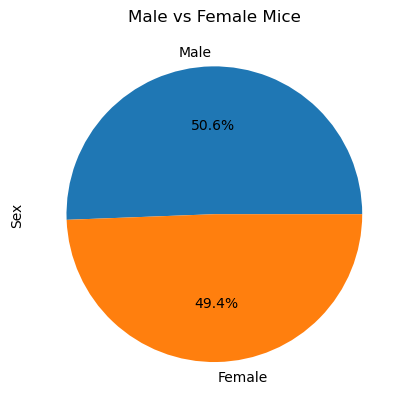

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Female','Male']
sizes=[49.7999197, 50.200803]
plot=gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mice')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

In [15]:

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = clean_df[clean_df["Drug Regimen"].isin(treatment_list)]
drugs.head()

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in treatment_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [17]:
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes 
# add subset 
# Determine outliers using upper and lower bounds

treatment = 0
for drug in treatment_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"The median of {drug} treatments is: {quartiles[0.5]}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
The median of Capomulin treatments is: 38.13
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
The median of Ramicane treatments is: 36.56
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
The median of Infubinol treatments is: 60.17
Values 

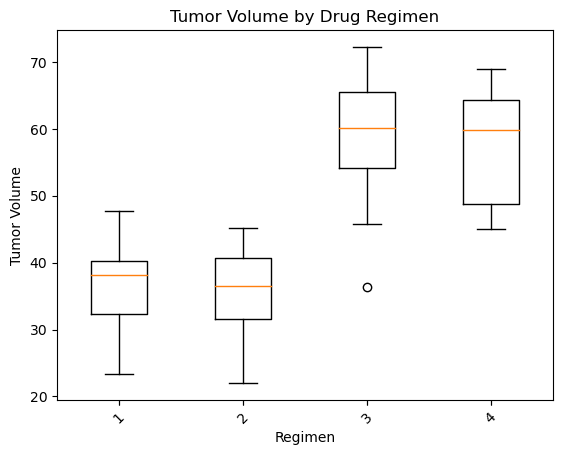

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot_list = []
for drug in treatment_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], treatment_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

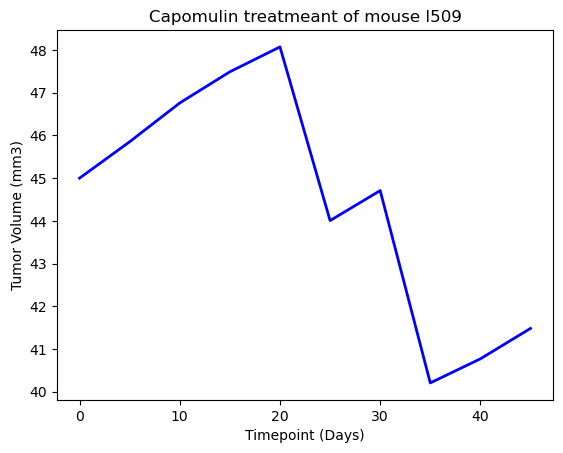

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line_tumor = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_tumor.head()
x_axis = line_tumor["Timepoint"]
tumor_size = line_tumor["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_size,linewidth=2, markersize=15,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#**Step one:** extract Capomulin data from the dataset
weight_df=combined_data_df[['Mouse ID','Drug Regimen','Weight (g)','Tumor Volume (mm3)']]

capomulin_weight=weight_df[weight_df['Drug Regimen']=='Capomulin']

#Calculate tumor volume average for each mouse 
avg_tumor_volume=capomulin_weight.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#Reset Index
avg_tumor_volume=avg_tumor_volume.reset_index()

#Rename 'Tumor Volume (mm3)' column
avg_tumor_volume=avg_tumor_volume.rename(columns={'Tumor Volume (mm3)':'Avg Tumor Volume (mm3)'})

#Remove duplicates 
new_capomulin_weight=capomulin_weight[['Mouse ID', 'Weight (g)']].drop_duplicates(subset='Mouse ID')

#Merge data 
mouse_avg_total_weight=pd.merge(new_capomulin_weight,avg_tumor_volume, on="Mouse ID")


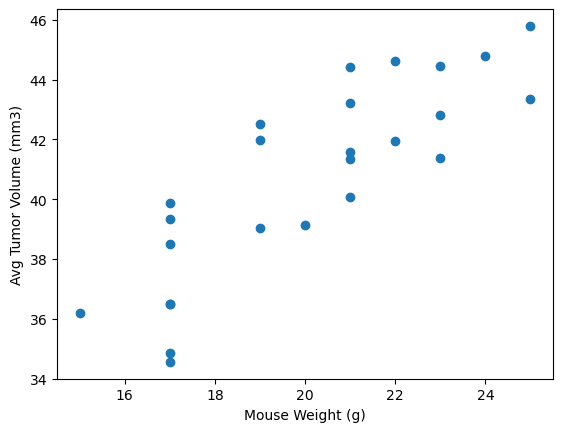

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

x_values = mouse_avg_total_weight['Weight (g)']
y_values = mouse_avg_total_weight['Avg Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume 0.84


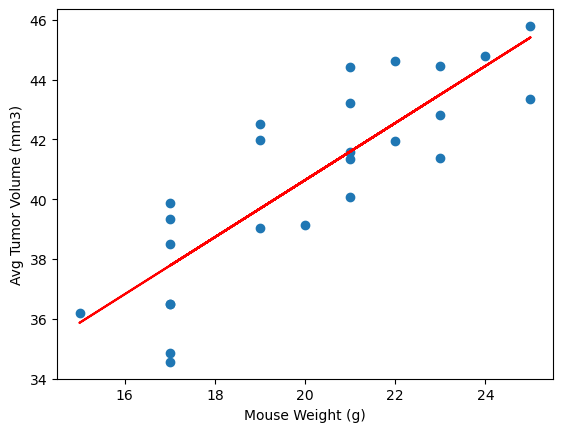

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

mouse_weight=mouse_avg_total_weight.iloc[:,1]
volume=mouse_avg_total_weight.iloc[:,2]
correlation = st.pearsonr(mouse_weight,volume)

print(f"The correlation between mouse weight and the average tumor volume {round(correlation[0],2)}")


#linear regression model 

x_values = mouse_avg_total_weight['Weight (g)']
y_values = mouse_avg_total_weight['Avg Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

In [23]:
print(f"The r-squared value is: {round(rvalue**2,3)}")

The r-squared value is: 0.709
